In [8]:
import autograd.numpy as np
import matplotlib.pyplot as plt
from ADVI import ADVI

In [9]:
covariance = np.array([[1,1.2],[1.2,2]]) #Connu
mean = np.array([-1,-3]) # A Estimer

In [10]:
def inv_T(x):
    return x
    
class gaussian():
    def __init__(self,mu,Sigma):
        self.mu = mu
        self.Sigma= Sigma
        self.M = len(self.mu)
        self.theta_size = self.M
    def log_gaussian(self,x,mu,sigma):
        return - 0.5*np.log((2*np.pi)**self.M*np.linalg.det(sigma))-(x-mu)@np.linalg.inv(sigma)@(x-mu).T/2
    def log_distr(self,X,theta):
        return self.log_gaussian(theta,self.mu,self.Sigma)+np.sum([self.log_gaussian(x,theta,covariance) for x in X],axis=0)#[np.random.choice(X.shape[0],size=100,replace=False)]]

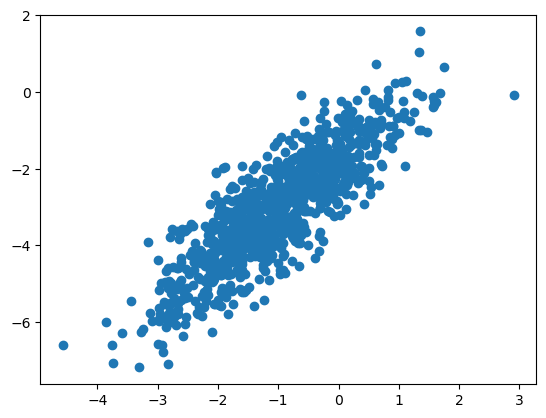

In [11]:
X = np.random.multivariate_normal(mean, covariance,1000)
plt.scatter(X[:,0],X[:,1])

In [12]:

model_ADVI = ADVI(inv_T,gaussian(np.zeros(2),1000*np.eye(2)),X,dependant=True)

In [13]:
model_ADVI.fit(lr=1,eps=1e-3,M=20,max_step=500)

2 [ 0.99968786 -0.99972655] [[0.99937142 0.0010402 ]
 [0.0010402  0.99636027]]
-8694.560748892129 inf
3 [ 0.84566645 -1.15233392] [[ 1.42935724 -0.79325275]
 [-0.79325275  1.00223971]]
-6571.546341848532 0.24417730445026947
4 [ 0.47318987 -1.10745453] [[ 0.03432529 -0.05333786]
 [-0.05333786  0.77293641]]
-8221.597707359806 0.25109027307675125
5 [ 0.25690394 -1.14844098] [[0.15634995 0.08333796]
 [0.08333796 0.31210887]]
-4570.665802569389 0.44406598750534554
6 [ 0.13656117 -1.23041598] [[0.03766612 0.0826814 ]
 [0.0826814  0.2847487 ]]
-3982.128199349494 0.12876408572445827
7 [ 0.07877236 -1.32641459] [[0.06086684 0.10710997]
 [0.10710997 0.18928004]]
-3479.6613690969625 0.12618047563978796
8 [ 0.04292021 -1.42578345] [[0.06464933 0.10229679]
 [0.10229679 0.16533963]]
-3328.780431687293 0.04336081055175376
9 [-0.00666887 -1.51391116] [[0.05669661 0.08352066]
 [0.08352066 0.12344622]]
-3310.353107919498 0.005535758259205583
10 [-0.05709437 -1.5925858 ] [[0.0477949  0.06994914]
 [0.0699

(array([-1.00214137, -2.99571983]),
 array([[-0.05131614,  0.26841027],
        [ 0.09270692,  0.30367249]]))

In [14]:
model_ADVI2 = ADVI(inv_T,gaussian(np.zeros(2),1000*np.eye(2)),X,dependant=False)

model_ADVI2.fit(lr=1,eps=1e-3,M=20,max_step=500)

2 [ 0.99988709 -0.99986463] [1.00004393 1.00009988]
-42059.0592229593 inf
3 [ 0.75019803 -0.9099878 ] [0.97385656 0.88189773]
-5885.333048258273 0.8600697886022716
4 [ 0.65154844 -0.9494612 ] [0.90893831 0.83266126]
-5904.981138925287 0.0033384840765857304
5 [ 0.53993008 -0.95137747] [0.81657405 0.7125199 ]
-7402.998370799521 0.25368704770272543
6 [ 0.4024105  -0.93233027] [0.75326122 0.64045731]
-6645.437806157026 0.10233158602744342
7 [ 0.34329128 -0.97197397] [0.68720533 0.63042766]
-5949.341827270907 0.1047479487718903
8 [ 0.36465197 -1.06747479] [0.66480181 0.59937954]
-4922.944819972469 0.1725227827040606
9 [ 0.27614256 -1.07557327] [0.62426028 0.58032415]
-5454.447301222389 0.10796433855882462
10 [ 0.29346275 -1.14827062] [0.59954438 0.56326337]
-4595.533820572816 0.1574703050952721
11 [ 0.25792412 -1.18990244] [0.56561414 0.54494423]
-5168.715929636295 0.1247259037671568
12 [ 0.19296941 -1.19894139] [0.55056607 0.51713963]
-4516.471150143688 0.12619087378216656
13 [ 0.13974951 

(array([-1.05379923, -2.95207603]), array([-2.13977667, -2.18319482]))